In [16]:
import pandas as pd
import os

save_path = os.path.join(os.getcwd(), 'dataset_merge')
if not os.path.exists(save_path):
    os.makedirs(save_path)

df = pd.read_csv(os.path.join(save_path, 'dataset_selected.csv'))

df.head()

,DateTime,Real_Time_Measurement_MW,Monitored_Capacity_MWp
0,2013-01-01 08:00:00,0.0,400.02
1,2013-01-01 08:15:00,0.0,400.02
2,2013-01-01 08:30:00,0.0,400.02
3,2013-01-01 08:45:00,0.0,400.02
4,2013-01-01 09:00:00,0.0,400.02


In [17]:
# Specify the column to track changes
column_name = "Monitored_Capacity_MWp"

# Find row indices where the value changes
change_rows = df.index[df[column_name] != df[column_name].shift()].tolist()

# Print the row numbers and corresponding DateTime values
print("Rows where value changes:")
for row in change_rows:
    print(f"Row: {row}, DateTime: {df.loc[row, 'DateTime']}")

df.iloc[[0, 3080, 17080, 31920, 39240, 75080]]

Rows where value changes:
Row: 0, DateTime: 2013-01-01 08:00:00
Row: 3080, DateTime: 2013-03-19 08:00:00
Row: 17080, DateTime: 2014-03-04 08:00:00
Row: 31920, DateTime: 2015-03-10 08:00:00
Row: 39240, DateTime: 2015-09-09 08:00:00
Row: 75080, DateTime: 2018-02-21 08:00:00


,DateTime,Real_Time_Measurement_MW,Monitored_Capacity_MWp
0,2013-01-01 08:00:00,0.00,400.02
3080,2013-03-19 08:00:00,7.16,414.22
17080,2014-03-04 08:00:00,10.14,446.05
31920,2015-03-10 08:00:00,1.40,451.82
39240,2015-09-09 08:00:00,32.00,460.10
75080,2018-02-21 08:00:00,7.73,481.46


In [18]:
# Reset index to access 'DateTime' column and convert it to datetime format
df = df.reset_index()
df['DateTime'] = pd.to_datetime(df['DateTime'])

# group by days in DateTime column
# Sum the values in Real_Time_Measurement_MW column and Monitored_Capacity_MWp column for each day
df = df.groupby(df['DateTime'].dt.date)[['Real_Time_Measurement_MW', 'Monitored_Capacity_MWp']].sum().reset_index()

df.head()

,DateTime,Real_Time_Measurement_MW,Monitored_Capacity_MWp
0,2013-01-01,521.22,16000.8
1,2013-01-02,1416.96,16000.8
2,2013-01-03,216.46,16000.8
3,2013-01-04,190.27,16000.8
4,2013-01-05,139.49,16000.8


In [19]:
# normalize the Real_Time_Measurement_MW with Monitored_Capacity_MWp use 3 digits
df['Normalized_Real_Time_Measurement_MW'] = df['Real_Time_Measurement_MW'] / df['Monitored_Capacity_MWp']   
df['Normalized_Real_Time_Measurement_MW'] = df['Normalized_Real_Time_Measurement_MW'].round(3)

df.head()

,DateTime,Real_Time_Measurement_MW,Monitored_Capacity_MWp,Normalized_Real_Time_Measurement_MW
0,2013-01-01,521.22,16000.8,0.033
1,2013-01-02,1416.96,16000.8,0.089
2,2013-01-03,216.46,16000.8,0.014
3,2013-01-04,190.27,16000.8,0.012
4,2013-01-05,139.49,16000.8,0.009


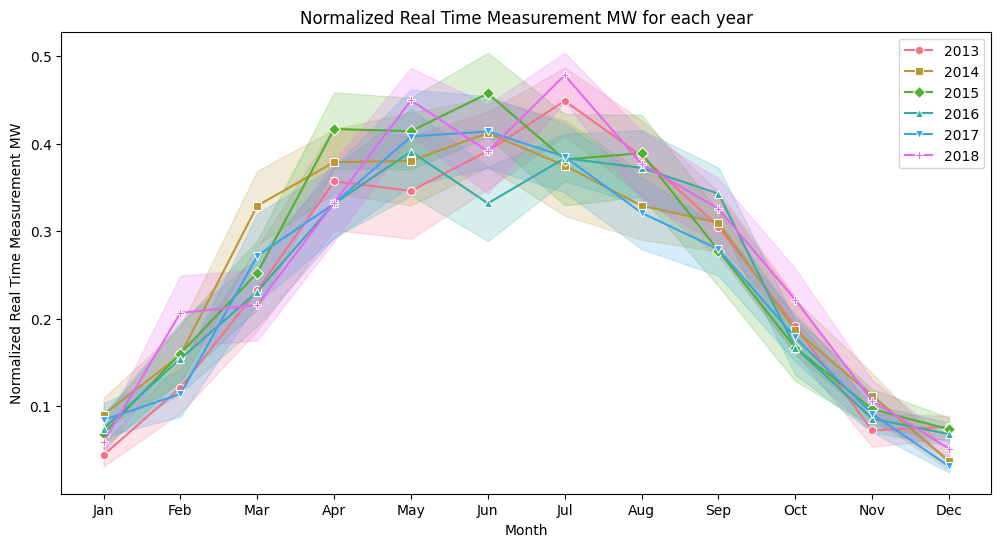

In [20]:
import seaborn as sns

# Ensure 'DateTime' column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# plot the normalized Real_Time_Measurement_MW for each year
# x-axis is month, y-axis is Normalized_Real_Time_Measurement_MW
# line is year
# plot with different color and marker for each year

Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['Month'].apply(lambda x: Month[x - 1])

# Define markers
markers = ['o', 's', 'D', '^', 'v', 'P']

# Define colors for each year
colors = sns.color_palette("husl", len(df['Year'].unique()))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
for i, year in enumerate(df['Year'].unique()):
    df_year = df[df['Year'] == year]
    sns.lineplot(
        x='Month',
        y='Normalized_Real_Time_Measurement_MW',
        data=df_year,
        marker=markers[i % len(markers)],
        label=year,
        ax=ax,
        color=colors[i % len(colors)]
    )

ax.set_xlabel('Month')
ax.set_ylabel('Normalized Real Time Measurement MW')
ax.set_title('Normalized Real Time Measurement MW for each year')
ax.legend()

plt.show()

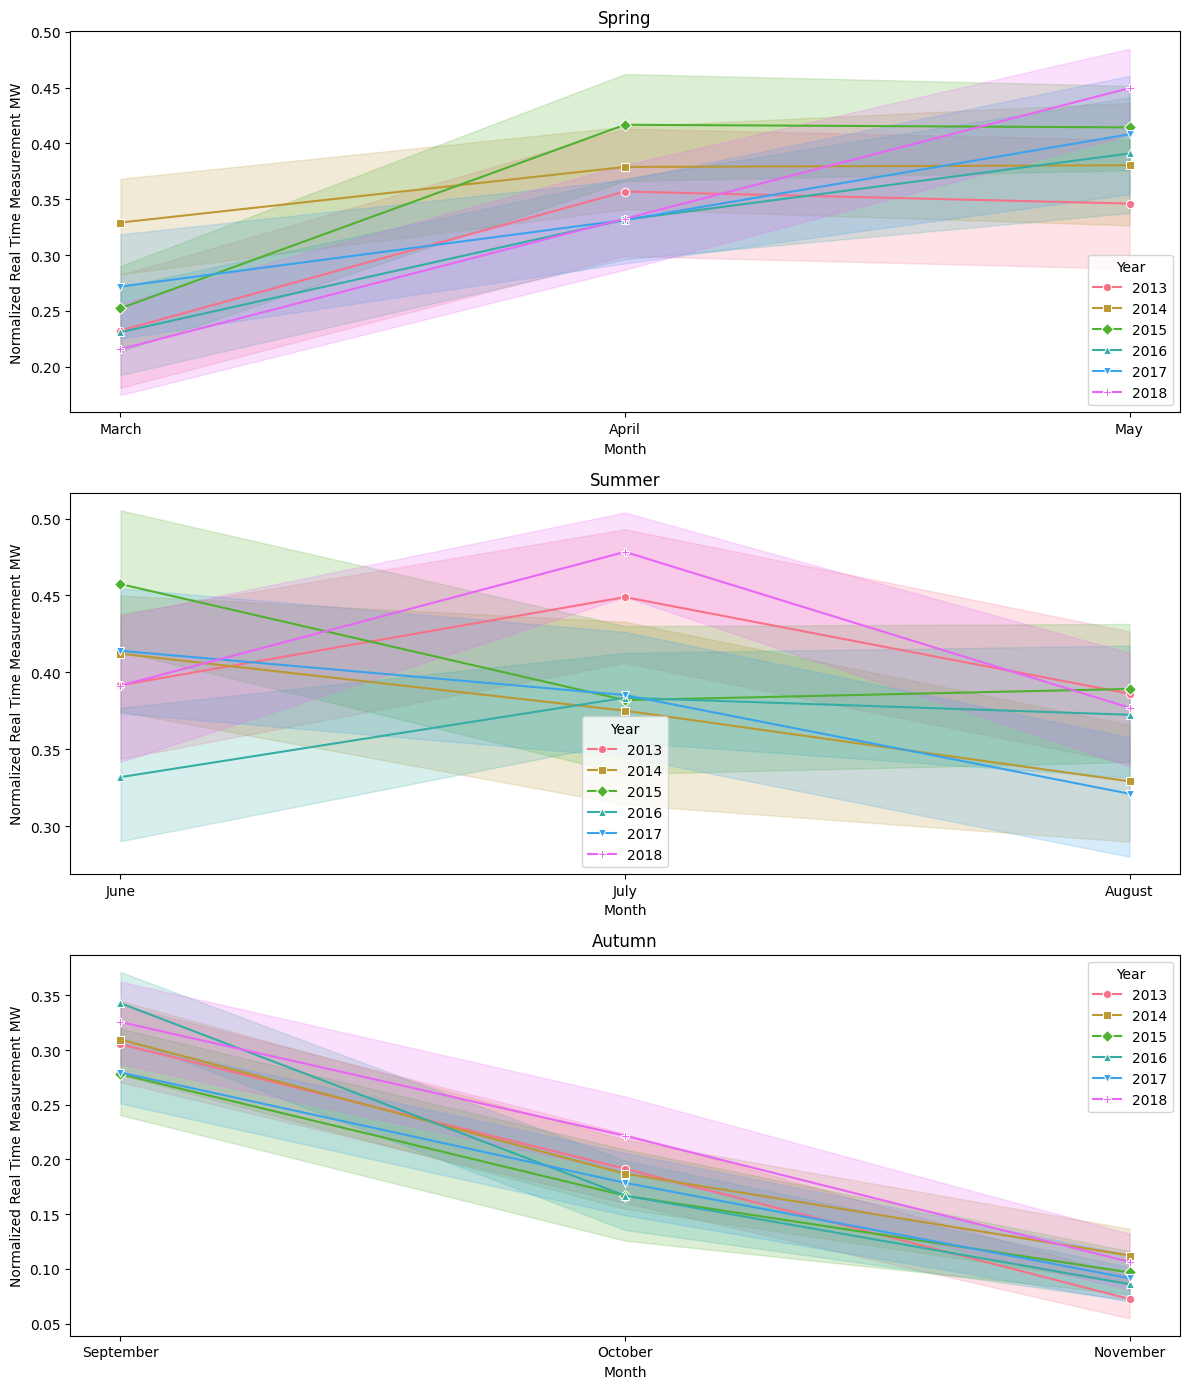

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Spring_months = ['March', 'April', 'May']
Summer_months = ['June', 'July', 'August']
Autumn_months = ['September', 'October', 'November']

# Define seasons without winter
seasons = {
    1: 'Spring',
    2: 'Summer',
    3: 'Autumn'
}

# Ensure 'DateTime' column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract year and month from 'DateTime' column
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month_name()

# Define a function to categorize months into seasons
def get_season(month):
    if month in Spring_months:
        return 1
    elif month in Summer_months:
        return 2
    elif month in Autumn_months:
        return 3

# Apply the function to create a 'Season' column
df['Season'] = df['Month'].apply(get_season)

# Extract unique years from the 'Year' column
years = df['Year'].unique()

# Define colors for each year
colors = sns.color_palette("husl", len(years))

# Plot the normalized Real_Time_Measurement_MW for each season
plt.figure(figsize=(12, 14))
markers = ['o', 's', 'D', '^', 'v', 'P']

for season, season_name in seasons.items():
    plt.subplot(3, 1, season)
    for i, year in enumerate(years):
        df_year_season = df[(df['Year'] == year) & (df['Season'] == season)]
        sns.lineplot(x=df_year_season['DateTime'].dt.month, y='Normalized_Real_Time_Measurement_MW', data=df_year_season, marker=markers[i], label=str(year), color=colors[i])
    if season == 1:
        plt.xticks([3, 4, 5], Spring_months)
    elif season == 2:
        plt.xticks([6, 7, 8], Summer_months)
    elif season == 3:
        plt.xticks([9, 10, 11], Autumn_months)
    plt.xlabel('Month')
    plt.ylabel('Normalized Real Time Measurement MW')
    plt.title(season_name)
    plt.legend(title='Year')

plt.tight_layout()
plt.show()

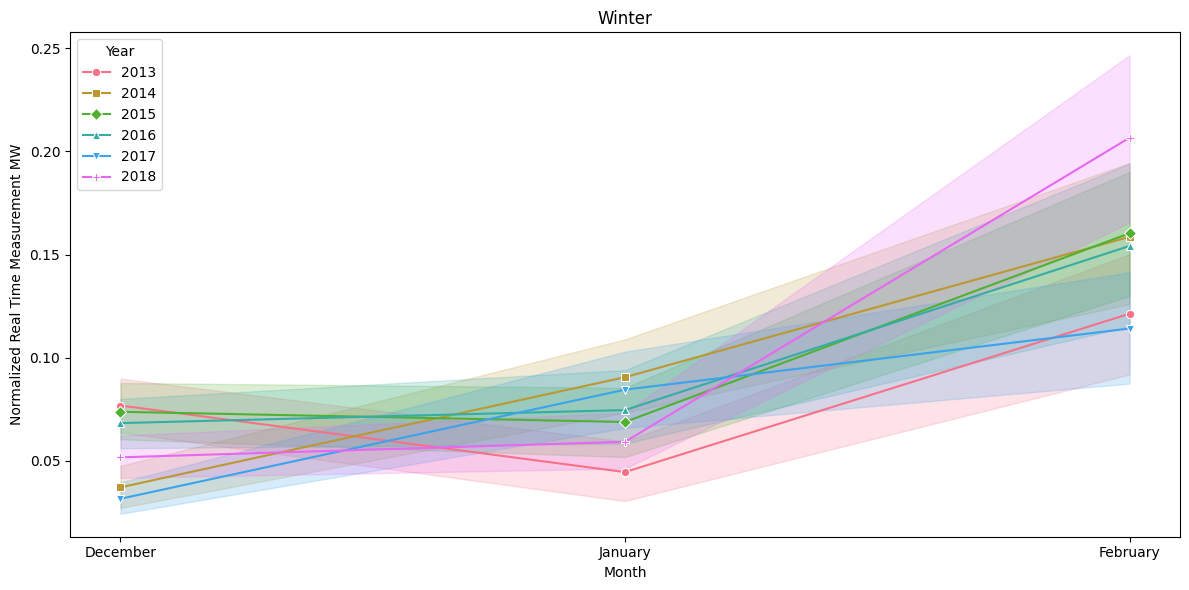

In [22]:
# Define winter months
Winter_months = ['December', 'January', 'February']

# Define seasons
seasons = {4: 'Winter'}

# Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract year and month
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month_name()

# Function to categorize winter months
def get_season(month):
    return 4 if month in Winter_months else None

df['Season'] = df['Month'].apply(get_season)

# Filter only winter months
df = df[df['Season'] == 4]

# Convert 'Month' to categorical type with correct order
df['Month'] = pd.Categorical(df['Month'], categories=Winter_months, ordered=True)

# Extract unique years
years = df['Year'].unique()

# Define colors for each year
colors = sns.color_palette("husl", len(years))

# Plot the normalized Real_Time_Measurement_MW for winter
plt.figure(figsize=(12, 6))
markers = ['o', 's', 'D', '^', 'v', 'P']

for season, season_name in seasons.items():
    plt.subplot(1, 1, 1)
    for i, year in enumerate(years):
        df_year_season = df[df['Year'] == year]
        sns.lineplot(
            x=df_year_season['Month'],  # Use categorical month
            y=df_year_season['Normalized_Real_Time_Measurement_MW'],
            data=df_year_season,
            marker=markers[i],
            label=str(year),
            color=colors[i]
        )

    plt.xlabel('Month')
    plt.ylabel('Normalized Real Time Measurement MW')
    plt.title(season_name)
    plt.legend(title='Year')

plt.xticks(rotation=0)  # Keep labels horizontal
plt.tight_layout()
plt.show()